In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
import sys
import os
 
# getting the current directory
current = os.getcwd()
 
# Getting the parent directory
parent = os.path.dirname(current)
 
# adding the parent directory to the sys.path.
sys.path.append(parent)
 
from FMTSClust import *
import numpy as np
import pandas as pd

In [19]:
# STEP 1 - DATA EXTRACTION
# use glob to get all the csv files 
# in the folder
path = "./Data_csv"

df = getSIMAGROdata(path)
df.shape

(19105, 7)

In [20]:
df = df.rename(columns={"Temp": "Temperature", "RelHum": "RelatHumidity", "Rain":"Rainfall"})
df.to_csv('SIMAGRO_Step1_Output.csv', index=False)

In [21]:
df = pd.read_csv('SIMAGRO_Step1_Output.csv')


In [22]:
df.shape

(19105, 7)

In [23]:
# STEP 1 - PREPROCESSING

# FILTERING

# Years: 2020 - 2023
# Season: october, november, december, january, february and march - 182 days

# one day after, one day before
df_filtered = filterByDate(df, "2020", "2023", "09-30", "04-01")

In [24]:
df_filtered.shape

(9899, 7)

In [25]:
#quality checking

QC_missing_null_values(df_filtered,"simagro")

Maximum number of measurements: 10374
Real number of measurements: 9899
Missing measurements: 475
Missing Values (%): 0.045787545787545784

Null values: 12
%: 0.001156737998843262


In [26]:
#quality checking

QC_outliers(df_filtered)

Upper_limit_T: 32.29895833333333
Lower_limit_T: 12.173958333333331
Temperature Outliers: 136
Upper_limit_RH: 108.01041666666669
Lower_limit_RH: 44.09374999999999
Relative Humidity Outliers: 65
Upper_limit_RF: 1.5000000000000002
Lower_limit_RF: -0.9000000000000001
Rainfall Outliers: 2126
Upper_limit_SR: 24.302500000000002
Lower_limit_SR: 0.08249999999999602
Solar Radiation Outliers: 22


In [27]:
df_filtered.to_csv('SIMAGRO_Step2_Output.csv', index=False)

In [40]:
# STEP 3 - FEATURE ENGINEERING

# aggregation
df = pd.read_csv('SIMAGRO_Step2_Output.csv')

In [41]:
df.shape

(9899, 7)

In [42]:
columns=['Temperature','RelatHumidity','Rainfall','SolarRad']
df_days = daily_aggregation(df,columns)

Minimum and maximum values for each variable:
> Temperature:
Min: 12.17ºC     Max: 29.88ºC

> Relative Humidity:
Min: 45.03%      Max: 95.73%

> Rainfall:
Min: 0.0"       Max: 1.5"

> Solar Radiation:
Min: 1.61 MJm2  Max: 17.84 MJm2



In [43]:
columns=['Temperature','RelatHumidity','Rainfall','SolarRad']
df_std = standardization(df_days, columns)

In [44]:
df_days.shape

(3458, 6)

In [45]:
df_std.shape

(3458, 6)

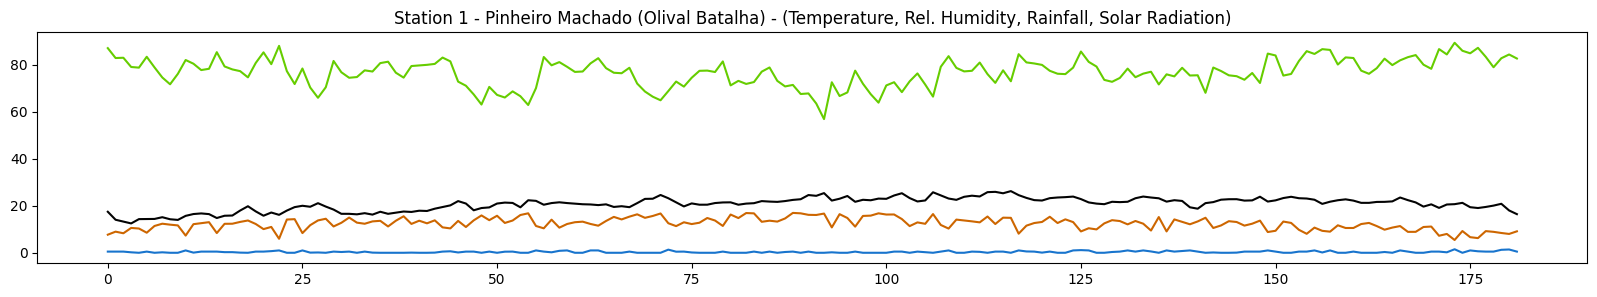

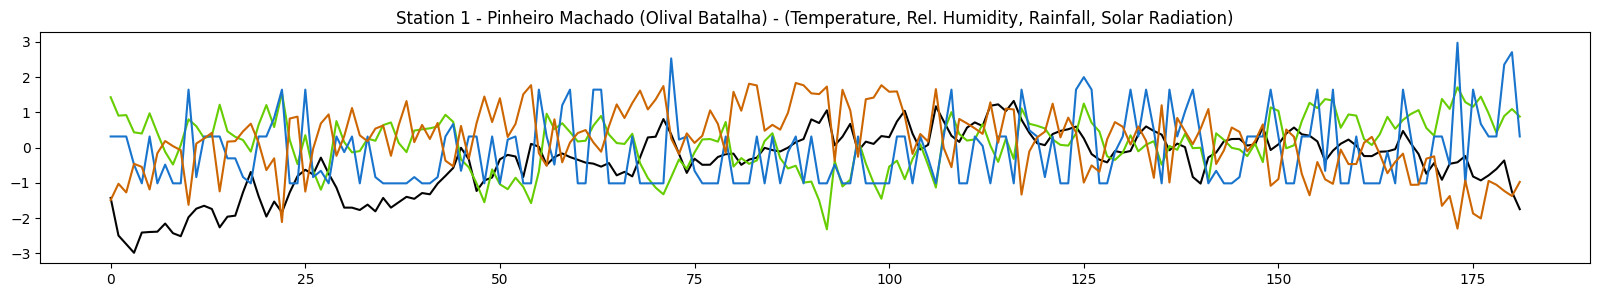

In [46]:
# Comparing Normal and Standardized Data
stations_list = df_days['StationID'].unique()
allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']

# DOY = 90 = March 31
doy_lower = 90
# DOY = 274 = October 1
doy_upper = 274

df_array = transform_dfTS_to_3Darray_DOYsorted(df_days,allColumns,doy_lower, doy_upper)
plot_first_TS(df_array,stations_list)

df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_std,allColumns,doy_lower, doy_upper)
plot_first_TS(df_array_std,stations_list)

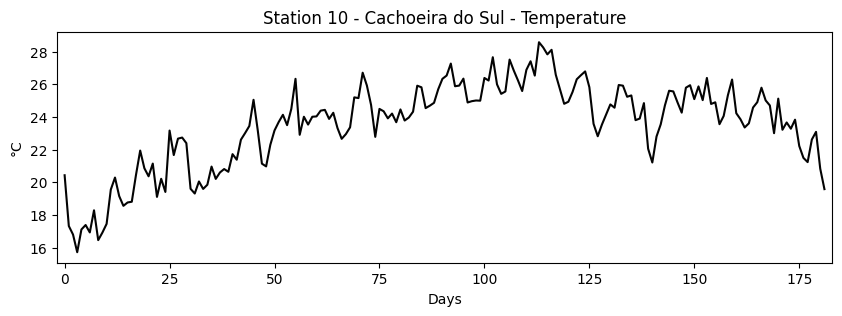

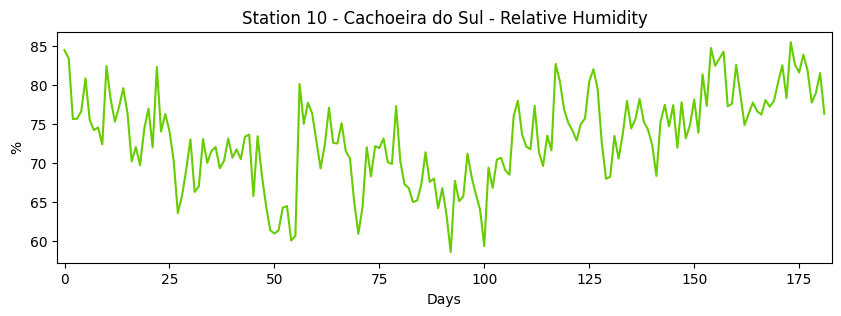

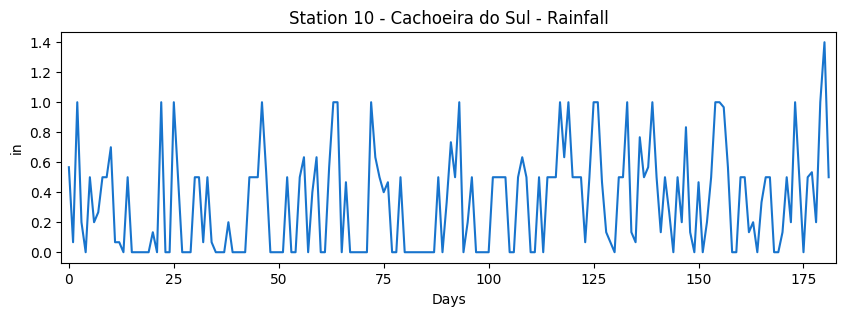

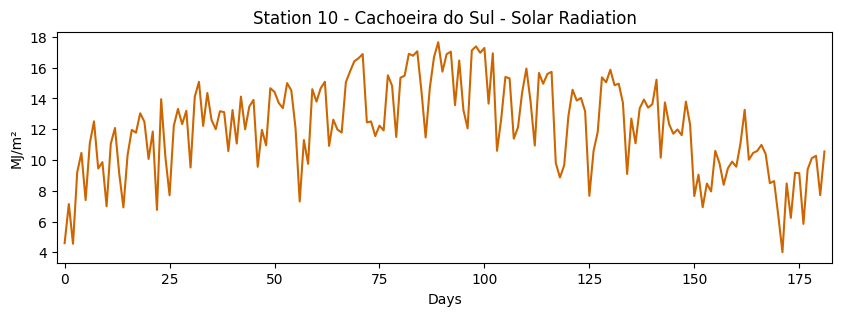

In [47]:
# Visualizing independent variables
plot_TS_by_index_separated_variables(df_array, stations_list, 9)

In [48]:
df_std.to_csv('SIMAGRO_Step3_Output.csv', index=False)

In [4]:
# STEP 4 - CLUSTERING

df_std = pd.read_csv('SIMAGRO_Step3_Output.csv')
df_std.dtypes

StationID          int64
doy                int64
Temperature      float64
RelatHumidity    float64
Rainfall         float64
SolarRad         float64
dtype: object

In [5]:
df_std.shape

(3458, 6)

In [6]:
allColumns=['Temperature', 'RelatHumidity', 'Rainfall', 'SolarRad']

# DOY = 90 = March 31
doy_lower = 90
# DOY = 274 = October 1
doy_upper = 274

df_array_std = transform_dfTS_to_3Darray_DOYsorted(df_std,allColumns,doy_lower,doy_upper)
df_array_std.shape

(19, 182, 4)

In [7]:
unique_station_ids = df_std['StationID'].unique()

stations = pd.read_csv('StationsList.csv')
names = stations[['StationName','StationID']]
names_sort = names.sort_values(by=['StationID'])
names_sort.head()

StationName  StationID
0  Pinheiro Machado (Olival Batalha)          1
1           Piratini (Olival Olivae)          2
2       São Sepé (Olival Prosperato)          3
3                    Itaqui (Vimaer)          4
4      Maçambara (Fazenda Espinilho)          5

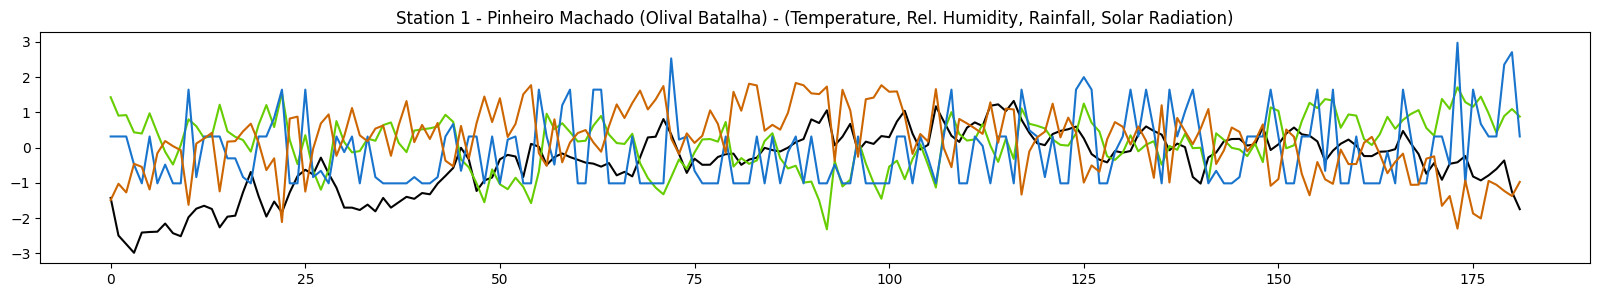

In [8]:
stations_list = df_std['StationID'].unique()
plot_first_TS(df_array_std,stations_list)

In [9]:
flattened_df_std = flatten_multivariate_time_series(df_array_std)
flattened_df_std.head()

station0_feature0  station0_feature1  station0_feature2  station0_feature3  \
0          -1.425302           1.429263           0.316360          -1.486027   
1          -2.490744           0.907396           0.316360          -1.023186   
2          -2.736239           0.922036           0.316360          -1.268921   
3          -2.979778           0.434616          -0.480461          -0.456565   
4          -2.406630           0.400169          -1.011675          -0.546031   

   station1_feature0  station1_feature1  station1_feature2  station1_feature3  \
0          -1.892384           2.239621          -0.126318          -2.564100   
1          -2.647126           1.515035           0.316360          -1.847174   
2          -2.752323           1.595561           0.316360          -1.562372   
3          -2.973910           0.896431           0.316360          -0.798923   
4          -2.365986           0.631823          -1.011675          -0.444636   

   station2_feature0  station2_feature1  ...  station16_feature2  \
0          -0.661974           1.190720  ...            0.980378   
1          -1.601354           0.844531  ...           -1.011675   
2          -2.216994           0.909118  ...            0.980378   
3          -2.336209           0.073787  ...           -0.214854   
4          -1.736545           0.130624  ...           -0.746068   

   station16_feature3  station17_feature0  station17_feature1  \
0           -2.024616           -0.358990            1.479211   
1           -0.985014           -0.698054            0.784249   
2           -0.961753           -0.819334            0.319219   
3           -1.307094           -1.238274           -0.498458   
4            0.412454           -1.146335            0.352805   

   station17_feature2  station17_feature3  station18_feature0  \
0            0.980378           -1.979883           -1.651996   
1            0.980378           -0.326540           -1.716875   
2            0.980378           -1.446662           -1.827723   
3           -0.480461            0.110057           -2.699833   
4            0.980378           -0.958174           -1.889341   

   station18_feature1  station18_feature2  station18_feature3  
0            1.760812            2.042807           -1.929781  
1            0.874672           -1.011675           -0.303278  
2            0.723537            0.980378           -0.451793  
3            0.710620           -1.011675           -0.559153  
4           -0.187147           -1.011675            0.600334  

[5 rows x 76 columns]

In [10]:
flattened_df_std.shape

(182, 76)

Clusters = 2  Silhouette Score: 0.276
Clusters = 3  Silhouette Score: 0.180
Clusters = 4  Silhouette Score: 0.162
Clusters = 5  Silhouette Score: 0.165
Clusters = 6  Silhouette Score: 0.172
Clusters = 7  Silhouette Score: 0.182
Clusters = 8  Silhouette Score: 0.157
Clusters = 9  Silhouette Score: 0.134
Clusters = 10  Silhouette Score: 0.140


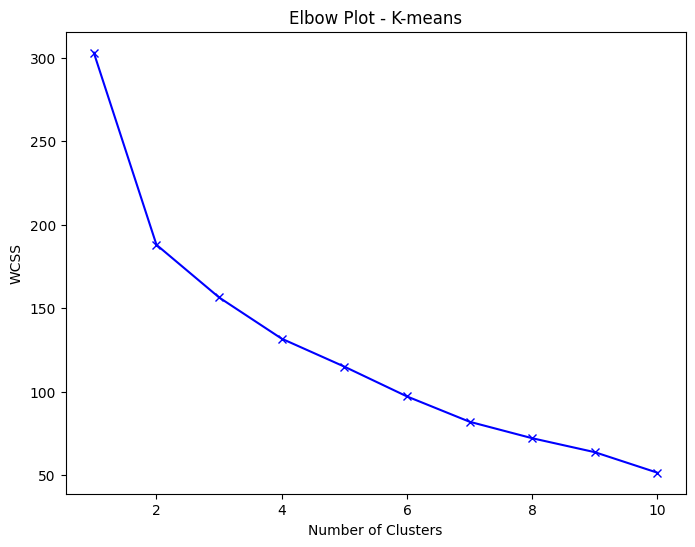

In [11]:
# K-MEANS

# Silhouette Score and Elbow Plot
sil_and_elbow_scores_TSKMeans(df_array_std,11,"euclidean",10,150)

Cluster 0
RMSE for station 0: 0.3762111071704184
RMSE for station 1: 0.31633215413697235
RMSE for station 2: 0.3348861332886557
RMSE for station 3: 0.459685270308941
RMSE for station 4: 0.37666863531335076
RMSE for station 5: 0.4334857051835524
RMSE for station 6: 0.49969669062130423
RMSE for station 7: 0.5733638296909259
RMSE for station 8: 0.6089176986248395
RMSE for Cluster 0: 0.44213858048210675
Cluster 1
RMSE for station 0: 0.38515306014184203
RMSE for station 1: 0.4581909347811963
RMSE for station 2: 0.5331256763162298
RMSE for station 3: 0.5151771270688834
RMSE for station 4: 0.7881753660448717
RMSE for station 5: 0.4746355031160997
RMSE for station 6: 0.4413686466534596
RMSE for station 7: 0.4432452832917875
RMSE for station 8: 0.6019971538682456
RMSE for station 9: 0.6503235838211757
RMSE for Cluster 1: 0.5291392335103791
Average Cluster RMSE: 0.4856389069962429


0.4856389069962429

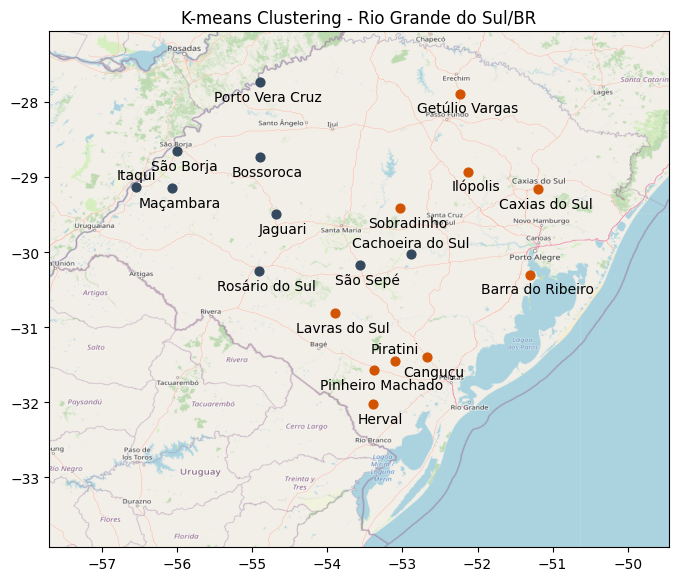

In [12]:
# K = 2
n_clusters=2
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.5328778347072249
RMSE for station 1: 0.4926091081405498
RMSE for station 2: 0.47775292797610514
RMSE for station 3: 0.6727635844286509
RMSE for station 4: 0.5039173331915191
RMSE for station 5: 0.6165002493680647
RMSE for Cluster 0: 0.5494035063020192
Cluster 1
RMSE for station 0: 0.4271360959350824
RMSE for station 1: 0.3583042114499834
RMSE for station 2: 0.47939696137240767
RMSE for station 3: 0.38663109590183686
RMSE for station 4: 0.4614227344735902
RMSE for station 5: 0.3627505981567601
RMSE for station 6: 0.6100785837530512
RMSE for station 7: 0.6398932885140785
RMSE for Cluster 1: 0.4657016961945988
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Average Cluster RMSE: 0.47615784257969707


0.47615784257969707

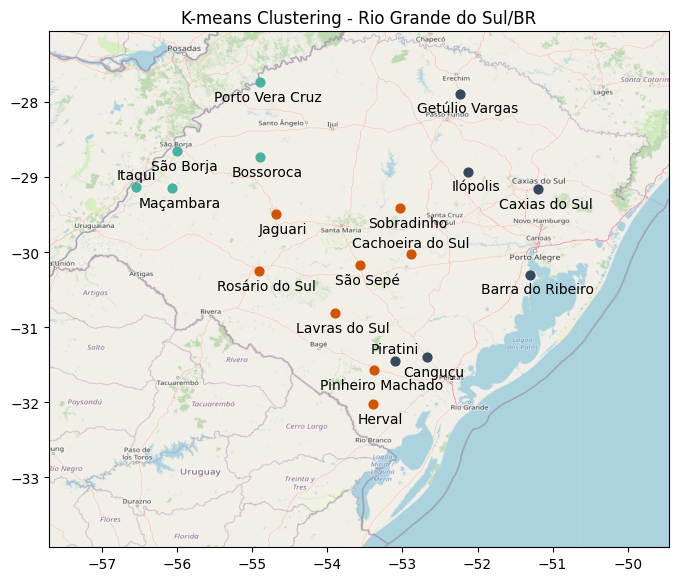

In [12]:
# K = 3
n_clusters=3
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 0: 0.4526213457905596
Cluster 1
RMSE for station 0: 0.4891839861807194
RMSE for station 1: 0.4824254762299084
RMSE for station 2: 0.675777273986106
RMSE for station 3: 0.539440434383434
RMSE for station 4: 0.6008674998100798
RMSE for Cluster 1: 0.5575389341180494
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.3739706839901135
RMSE for station 1: 0.4728043788914443
RMSE for station 2: 0.39702932780699995
RMSE for station 3: 0.420091440026448
RMSE for Cluster 3: 0.41597395767875145
Average Cluster RMSE: 0.45987564070745846


0.45987564070745846

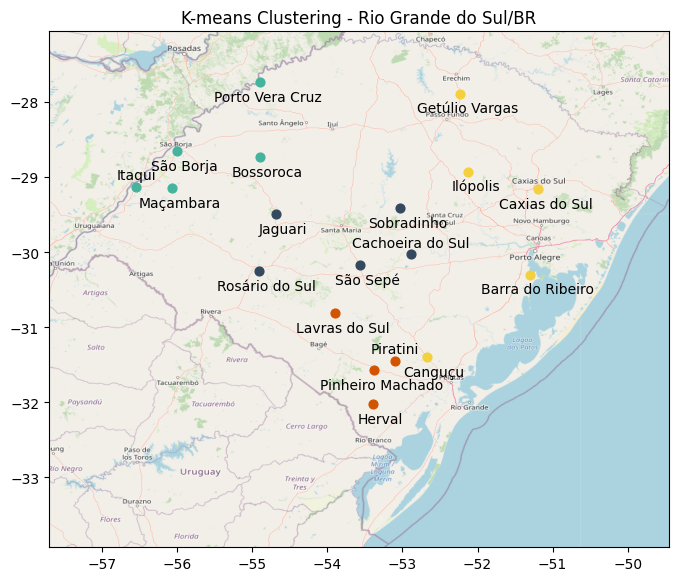

In [13]:
# K = 4
n_clusters=4
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.3739706839901135
RMSE for station 1: 0.4728043788914443
RMSE for station 2: 0.39702932780699995
RMSE for station 3: 0.420091440026448
RMSE for Cluster 0: 0.41597395767875145
Cluster 1
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 1: 0.4133683252424733
Cluster 2
RMSE for station 0: 0.4891839861807194
RMSE for station 1: 0.4824254762299084
RMSE for station 2: 0.675777273986106
RMSE for station 3: 0.539440434383434
RMSE for station 4: 0.6008674998100798
RMSE for Cluster 2: 0.5575389341180494
Cluster 3
RMSE for station 0: 0.6767029278602406
RMSE for station 1: 0.5772207261497803
RMSE for Cluster 3: 0.6269618270050104
Cluster 4
RMSE for station 0: 0.36159942841974874
RMSE for station 1: 0.4532862065464944
RMSE for station 2: 0.3538554914451625
RMSE for Cluster 4: 0.38958037547046853
Average Clu

0.48068468390295055

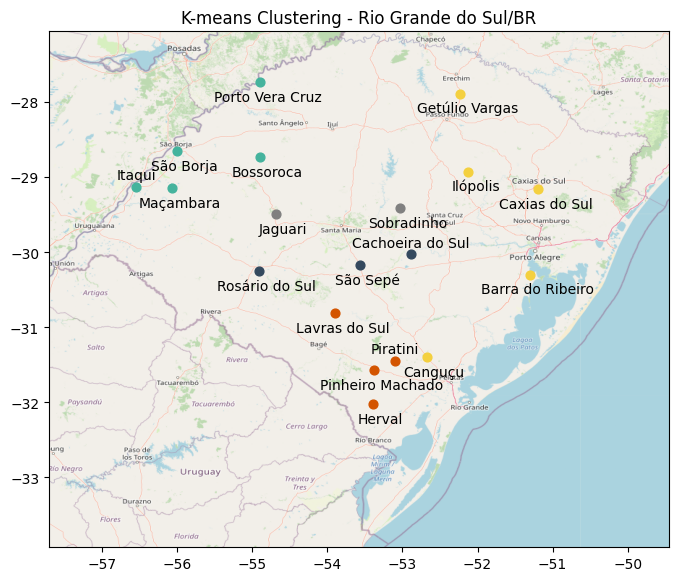

In [14]:
# K = 5
n_clusters=5
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.6767029278602406
RMSE for station 1: 0.5772207261497803
RMSE for Cluster 0: 0.6269618270050104
Cluster 1
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 1: 0.4133683252424733
Cluster 2
RMSE for station 0: 0.3739706839901135
RMSE for station 1: 0.4728043788914443
RMSE for station 2: 0.39702932780699995
RMSE for station 3: 0.420091440026448
RMSE for Cluster 2: 0.41597395767875145
Cluster 3
RMSE for station 0: 0.6778796839459892
RMSE for station 1: 0.5598470074437912
RMSE for Cluster 3: 0.6188633456948902
Cluster 4
RMSE for station 0: 0.36159942841974874
RMSE for station 1: 0.4532862065464944
RMSE for station 2: 0.3538554914451625
RMSE for Cluster 4: 0.38958037547046853
Cluster 5
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193

0.49864695481206717

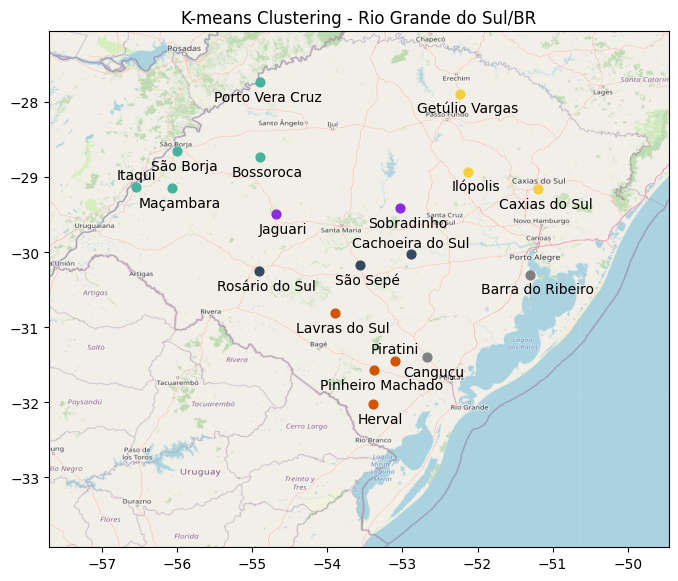

In [15]:
# K = 6
n_clusters=6
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Cluster 0
RMSE for station 0: 0.5606143442494544
RMSE for station 1: 0.5517241844615436
RMSE for Cluster 0: 0.556169264355499
Cluster 1
RMSE for station 0: 0.2927741146186524
RMSE for station 1: 0.32156277592325866
RMSE for station 2: 0.44033362680328786
RMSE for station 3: 0.4786199816026702
RMSE for Cluster 1: 0.38332262473696727
Cluster 2
RMSE for station 0: 0.3731185954540494
RMSE for station 1: 0.4321446553918538
RMSE for station 2: 0.3928574265608811
RMSE for station 3: 0.7068787998268665
RMSE for Cluster 2: 0.47624986930841273
Cluster 3
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 3: 0.5271338977808092
Cluster 4
RMSE for Cluster 4: 0.0
Cluster 5
RMSE for station 0: 0.3607273635726048
RMSE for station 1: 0.42303537774931793
RMSE for station 2: 0.35559281930145503
RMSE for station 3: 0.6842706953973476
RMSE for Cluster 5: 0.45590656400518137
Cluster 6
RMSE for Cluster 6: 0.0
Average Cluster RM

0.3426831743124099

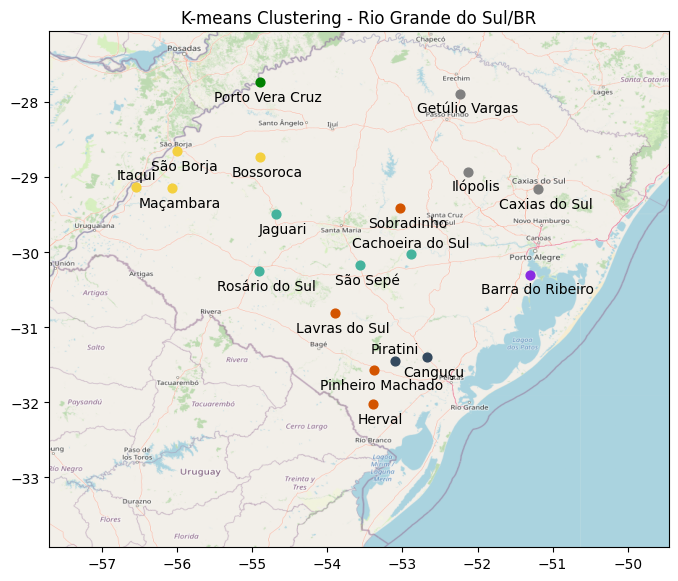

In [16]:
# K = 7
n_clusters=7
y_pred_Kmeans_std = cluster_labels_TSKmeans(df_array_std,n_clusters,"euclidean",10,50)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmeans_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmeans_std)

Clusters = 2  Silhouette Score: 0.276
Clusters = 3  Silhouette Score: 0.168
Clusters = 4  Silhouette Score: 0.162
Clusters = 5  Silhouette Score: 0.175
Clusters = 6  Silhouette Score: 0.122
Clusters = 7  Silhouette Score: 0.134
Clusters = 8  Silhouette Score: 0.093
Clusters = 9  Silhouette Score: 0.044
Clusters = 10  Silhouette Score: 0.044


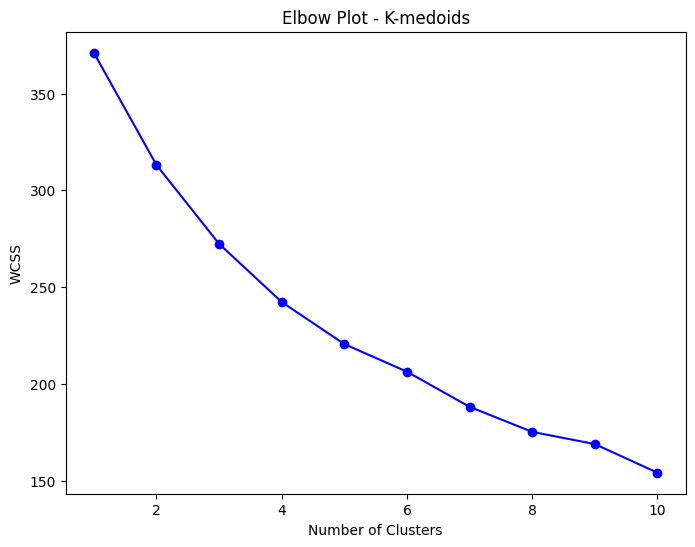

In [17]:
# K-MEDOIDS

# Silhouette Score and Elbow Plot
sil_and_elbow_scores_TSKMedoids(df_array_std, 11, 300)

Cluster 0
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 0: 0.4133683252424733
Cluster 1
RMSE for station 0: 0.4400931747281847
RMSE for station 1: 0.5001742272970768
RMSE for station 2: 0.5332787487553765
RMSE for station 3: 0.6826312678787134
RMSE for station 4: 0.5081004375473437
RMSE for station 5: 0.4734355365670363
RMSE for station 6: 0.6123395585401539
RMSE for Cluster 1: 0.5357218501876979
Cluster 2
RMSE for station 0: 0.47795563533884927
RMSE for station 1: 0.3443331073068366
RMSE for station 2: 0.4982163178219198
RMSE for station 3: 0.36263269958715255
RMSE for station 4: 0.38807942765836567
RMSE for station 5: 0.6081992663908529
RMSE for station 6: 0.58838633760035
RMSE for Cluster 2: 0.46682897024347525
Average Cluster RMSE: 0.4719730485578822


0.4719730485578822

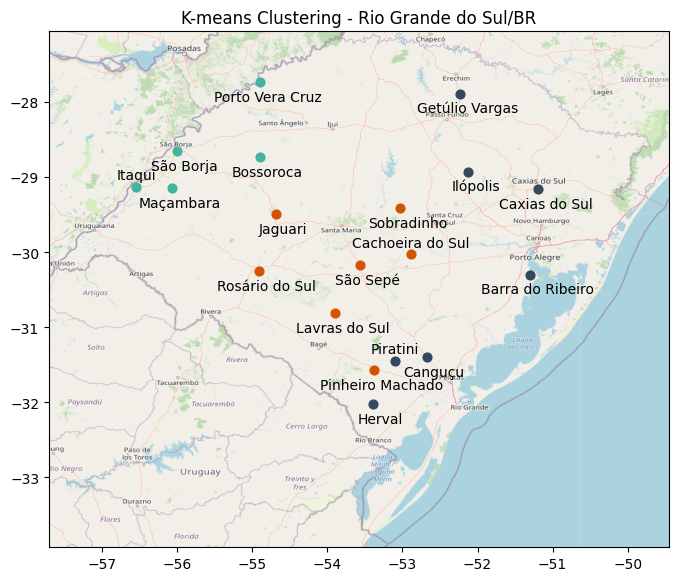

In [18]:
# K = 3
n_clusters=3
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, n_clusters, 300)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.4834932216136244
RMSE for station 1: 0.5120912918388592
RMSE for station 2: 0.7237970265211402
RMSE for station 3: 0.5935008909874746
RMSE for Cluster 0: 0.5782206077402746
Cluster 1
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 1: 0.4526213457905596
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.36135816270244653
RMSE for station 1: 0.4636352734203573
RMSE for station 2: 0.47114813217049967
RMSE for station 3: 0.41674417607431236
RMSE for station 4: 0.40547009094881736
RMSE for Cluster 3: 0.4236711670632866
Average Cluster RMSE: 0.46697036145914855


0.46697036145914855

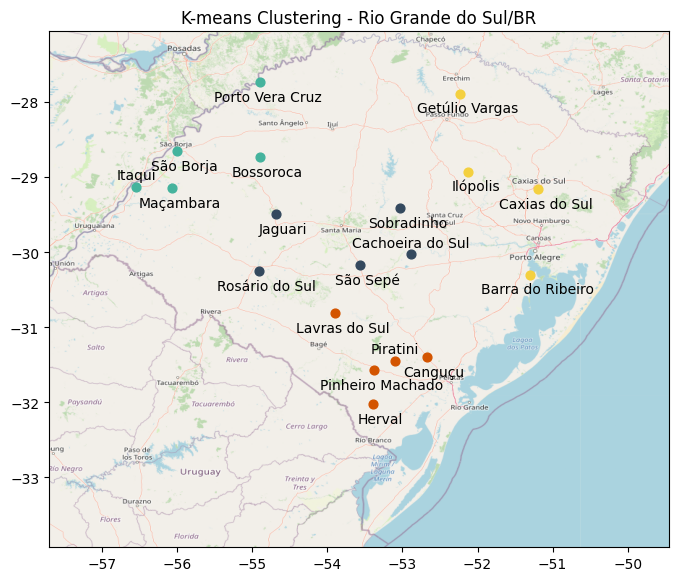

In [19]:
# K = 4
n_clusters=4
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, n_clusters, 300)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.6778796839459892
RMSE for station 1: 0.5598470074437912
RMSE for Cluster 0: 0.6188633456948902
Cluster 1
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 1: 0.4526213457905596
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.3739706839901135
RMSE for station 1: 0.4728043788914443
RMSE for station 2: 0.39702932780699995
RMSE for station 3: 0.420091440026448
RMSE for Cluster 3: 0.41597395767875145
Cluster 4
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 4: 0.5271338977808092
Average Clus

0.4855921744374968

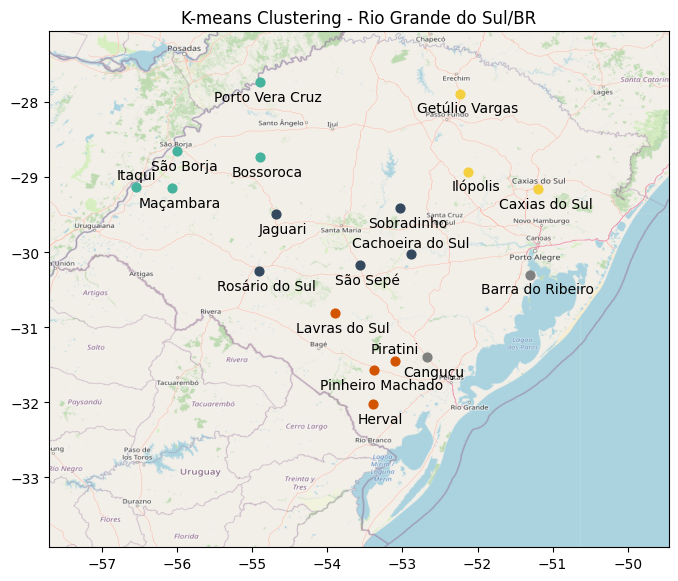

In [20]:
# K = 5
n_clusters=5
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, n_clusters, 300)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.6778796839459892
RMSE for station 1: 0.5598470074437912
RMSE for Cluster 0: 0.6188633456948902
Cluster 1
RMSE for station 0: 0.3983507386534745
RMSE for station 1: 0.3415828054802534
RMSE for station 2: 0.6329922808823465
RMSE for station 3: 0.527023423490679
RMSE for Cluster 1: 0.4749873121266883
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.3739706839901135
RMSE for station 1: 0.4728043788914443
RMSE for station 2: 0.39702932780699995
RMSE for station 3: 0.420091440026448
RMSE for Cluster 3: 0.41597395767875145
Cluster 4
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 4: 0.5271338977808092
Cluster 5
RMSE for Cluster 5: 0.0
Average Cluster R

0.40838780642060213

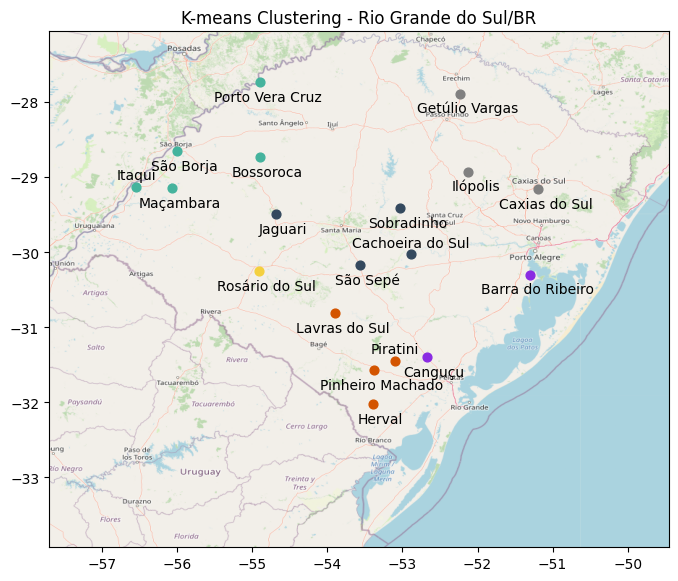

In [21]:
# K = 6
n_clusters=6
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, n_clusters, 300)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

Cluster 0
RMSE for station 0: 0.6767029278602406
RMSE for station 1: 0.5772207261497803
RMSE for Cluster 0: 0.6269618270050104
Cluster 1
RMSE for station 0: 0.4083808610899195
RMSE for station 1: 0.35838074722334085
RMSE for Cluster 1: 0.3833808041566302
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.3658369543152866
RMSE for station 1: 0.41764579758653486
RMSE for station 2: 0.4116046775877277
RMSE for Cluster 3: 0.3983624764965164
Cluster 4
RMSE for Cluster 4: 0.0
Cluster 5
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 5: 0.5271338977808092
Cluster 6
RMSE for station 0: 0.5441345660378026
RMSE for station 1: 0.6696060297536999
RMSE for station 2: 0.4848426521032721
RMSE 

0.4164859638066235

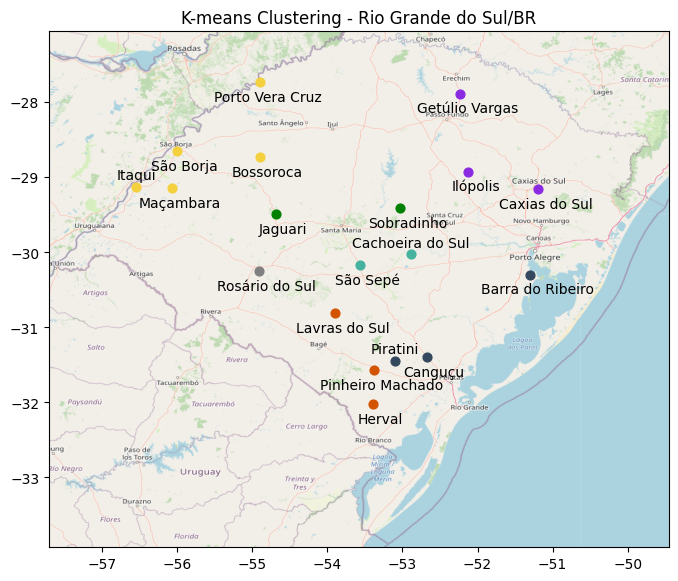

In [22]:
# K = 7
n_clusters=7
y_pred_Kmedoids_std, cluster_medoids_std = cluster_labels_TSKMedoids(df_array_std, n_clusters, 300)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,y_pred_Kmedoids_std, "K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, y_pred_Kmedoids_std)

In [23]:
# HIERARCHICAL CLUSTERING

list_names_dendogram = []
for index, row in names_sort.iterrows():
    stID = row['StationID']
    if stID in unique_station_ids:
        list_names_dendogram.append(row['StationName'])
        
list_names_dendogram

['Pinheiro Machado (Olival Batalha)',
 'Piratini (Olival Olivae)',
 'São Sepé (Olival Prosperato)',
 'Itaqui (Vimaer)',
 'Maçambara (Fazenda Espinilho)',
 'Rosário do Sul (Vila Temp)',
 'Getúlio Vargas (Ideal)',
 'Ilópolis (Ibramate)',
 'Barra do Ribeiro (Olival Prosperato)',
 'Cachoeira do Sul (Capané)',
 'Canguçu (Olival Capolivo)',
 'Herval (Fazenda Pitangueira)',
 'Lavras do Sul (Fazenda Galpão)',
 'São Borja (DDPA)',
 'Bossoroca (Sindicato Rural)',
 'Jaguari (Mirante Minuzzi)',
 'Caxias do Sul (DDPA)',
 'Porto Vera Cruz (Prefeitura)',
 'Sobradinho (SSBD)']

In [24]:
sil_score_TSHierarcClustering(df_array_std)

Clusters = 2  Silhouette Score: 0.249
Clusters = 3  Silhouette Score: 0.165
Clusters = 4  Silhouette Score: 0.141
Clusters = 5  Silhouette Score: 0.148
Clusters = 6  Silhouette Score: 0.150
Clusters = 7  Silhouette Score: 0.158
Clusters = 8  Silhouette Score: 0.139
Clusters = 9  Silhouette Score: 0.135
Clusters = 10  Silhouette Score: 0.130
Clusters = 11  Silhouette Score: 0.126
Clusters = 12  Silhouette Score: 0.118
Clusters = 13  Silhouette Score: 0.102
Clusters = 14  Silhouette Score: 0.090
Clusters = 15  Silhouette Score: 0.077
Clusters = 16  Silhouette Score: 0.058
Clusters = 17  Silhouette Score: 0.042
Clusters = 18  Silhouette Score: 0.042


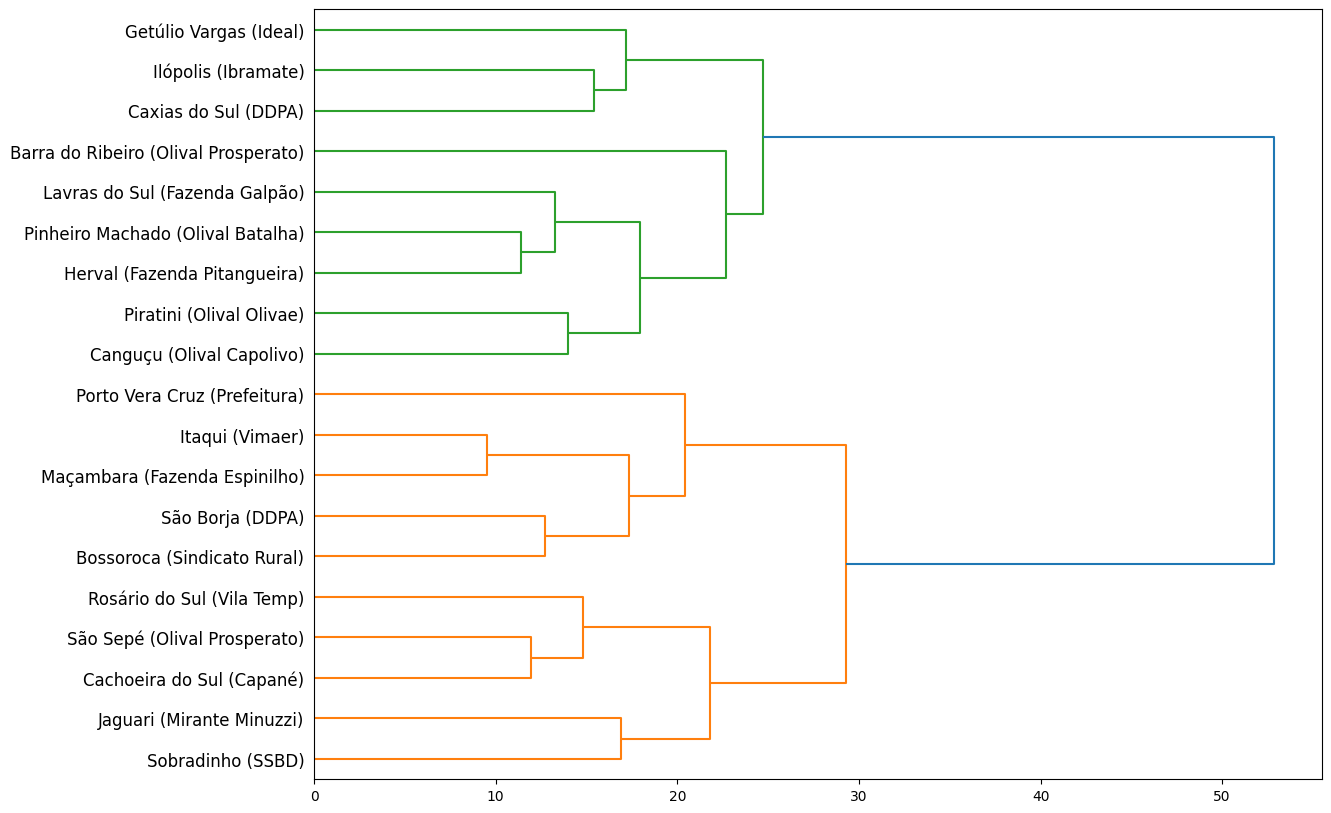

Cluster 1
RMSE for station 0: 0.38225280156824615
RMSE for station 1: 0.4607636311199802
RMSE for station 2: 0.5141450548328766
RMSE for station 3: 0.525804593198097
RMSE for station 4: 0.7632030256168357
RMSE for station 5: 0.4860851833615287
RMSE for station 6: 0.4310118496015836
RMSE for station 7: 0.428131069665643
RMSE for station 8: 0.6102589740561112
RMSE for Cluster 1: 0.511295131446767
Cluster 2
RMSE for station 0: 0.3927104379212215
RMSE for station 1: 0.327829580072163
RMSE for station 2: 0.3467617364971258
RMSE for station 3: 0.4655811589855385
RMSE for station 4: 0.3667886527981016
RMSE for station 5: 0.44208546395697895
RMSE for station 6: 0.5156152681434835
RMSE for station 7: 0.5531054341084095
RMSE for station 8: 0.6341081993187909
RMSE for station 9: 0.5560836475896133
RMSE for Cluster 2: 0.46006695793914265
Average Cluster RMSE: 0.4856810446929548


0.4856810446929548

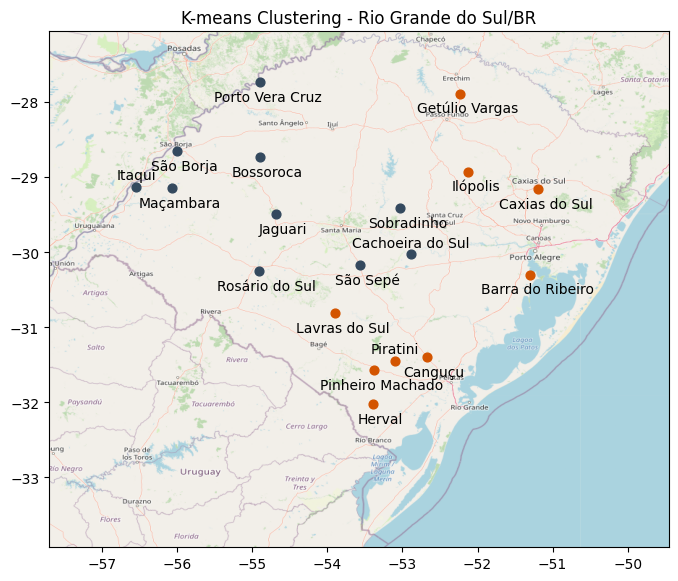

In [25]:
# K = 2
n_clusters=2
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

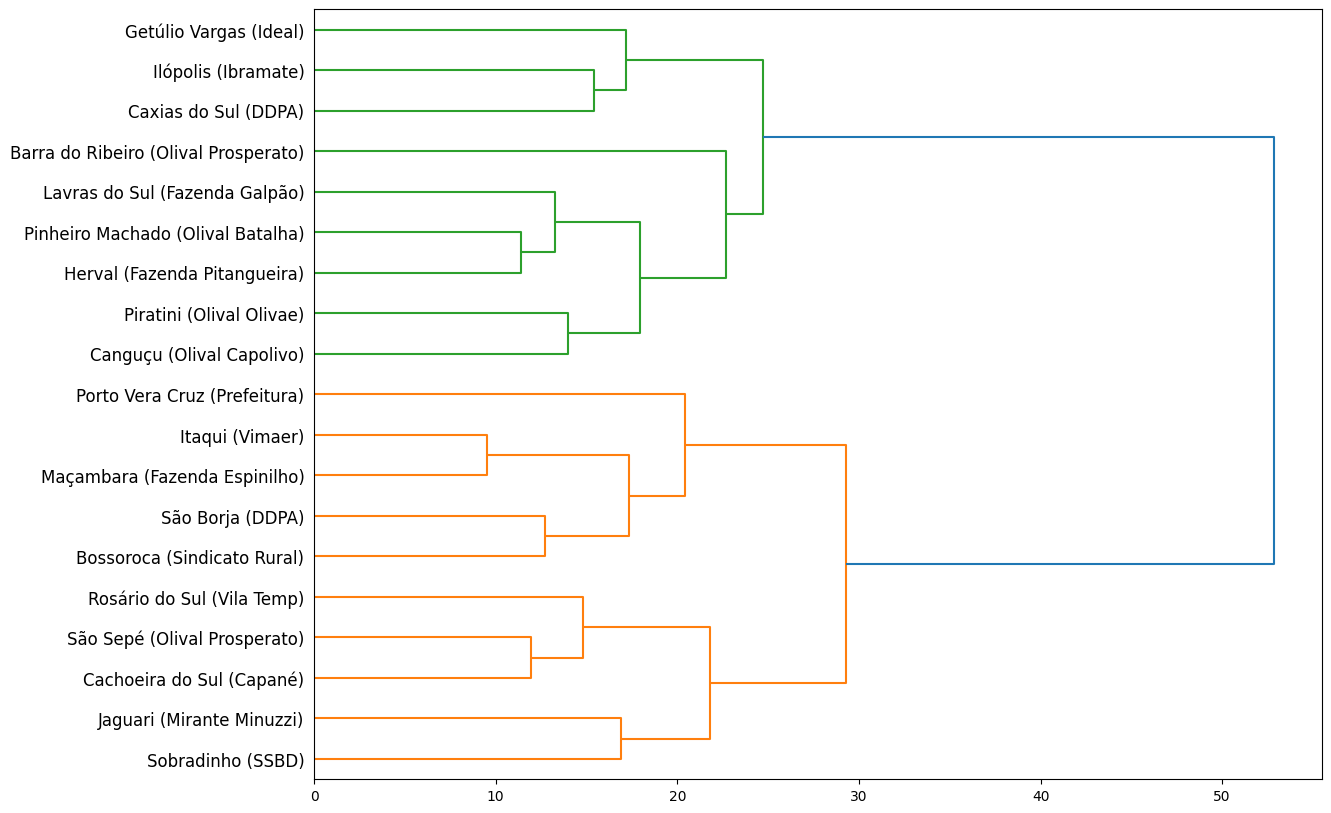

Cluster 1
RMSE for station 0: 0.38225280156824615
RMSE for station 1: 0.4607636311199802
RMSE for station 2: 0.5141450548328766
RMSE for station 3: 0.525804593198097
RMSE for station 4: 0.7632030256168357
RMSE for station 5: 0.4860851833615287
RMSE for station 6: 0.4310118496015836
RMSE for station 7: 0.428131069665643
RMSE for station 8: 0.6102589740561112
RMSE for Cluster 1: 0.511295131446767
Cluster 2
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 2: 0.4133683252424733
Cluster 3
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 3: 0.4526213457905596
Average Cluster RMSE: 0.4590949341599333


0.4590949341599333

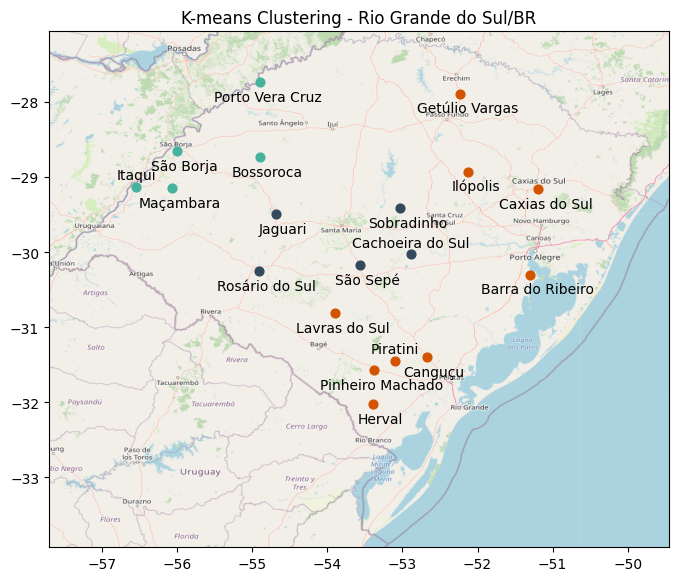

In [26]:
# K = 3
n_clusters=3
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

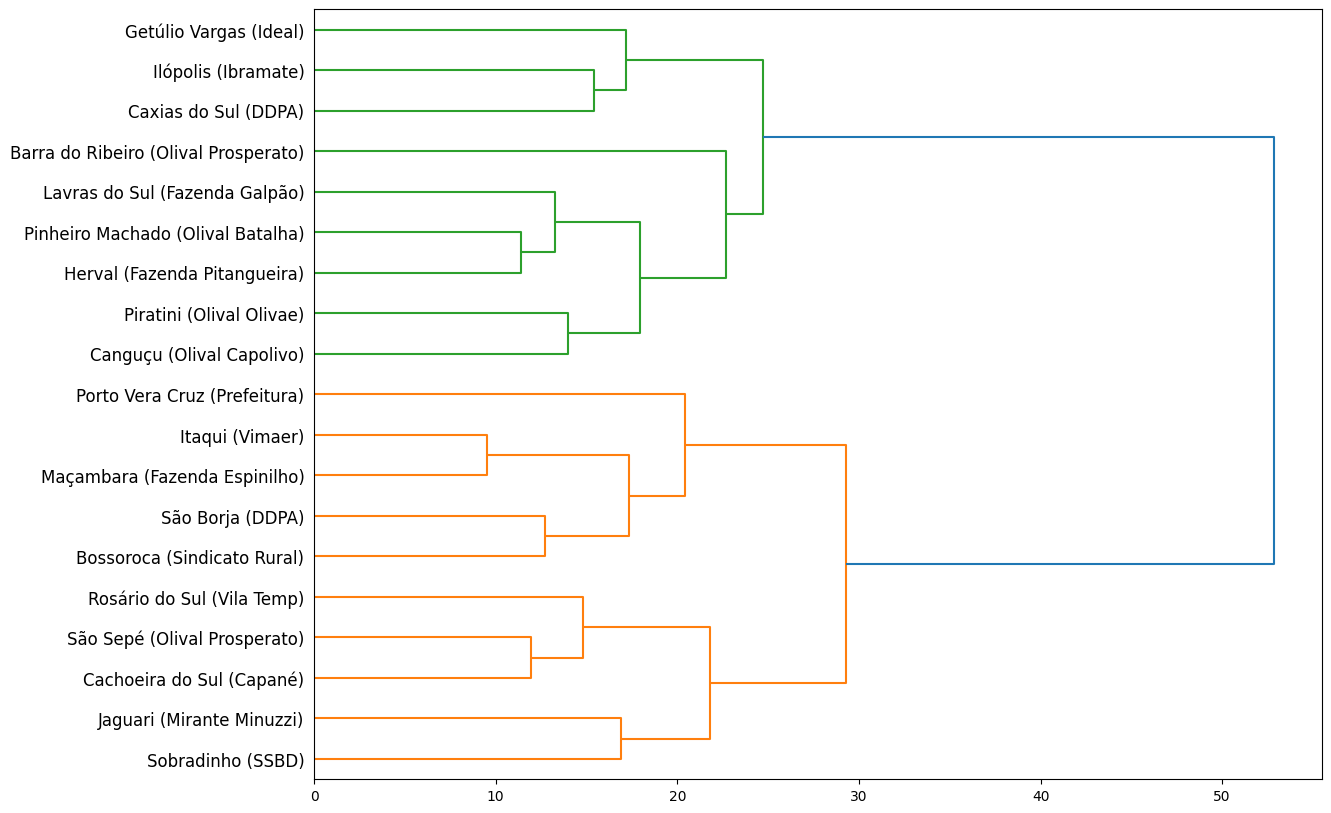

Cluster 1
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 1: 0.5271338977808092
Cluster 2
RMSE for station 0: 0.37582834727405273
RMSE for station 1: 0.4566176121672333
RMSE for station 2: 0.7020506624504756
RMSE for station 3: 0.4538520857254795
RMSE for station 4: 0.42995223832384616
RMSE for station 5: 0.42198960701561433
RMSE for Cluster 2: 0.47338175882611694
Cluster 3
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 3: 0.4133683252424733
Cluster 4
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 4: 0.4526213457905596
Average Cluster RMSE: 0.4666263319099898


0.4666263319099898

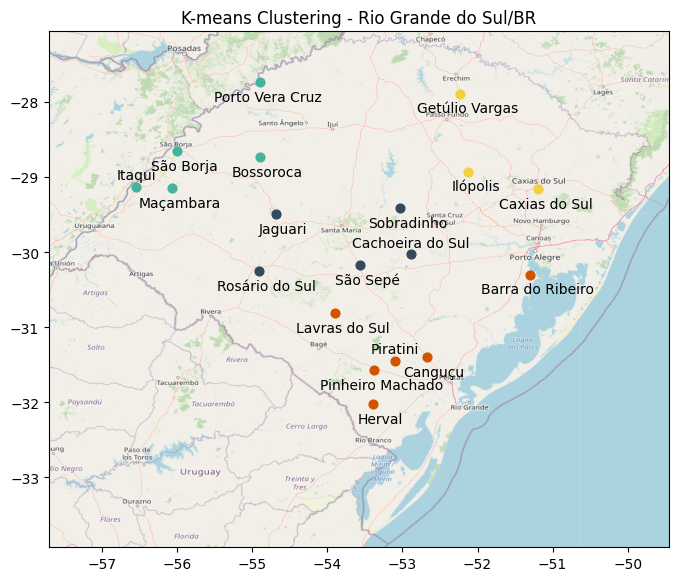

In [27]:
# K = 4
n_clusters=4
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

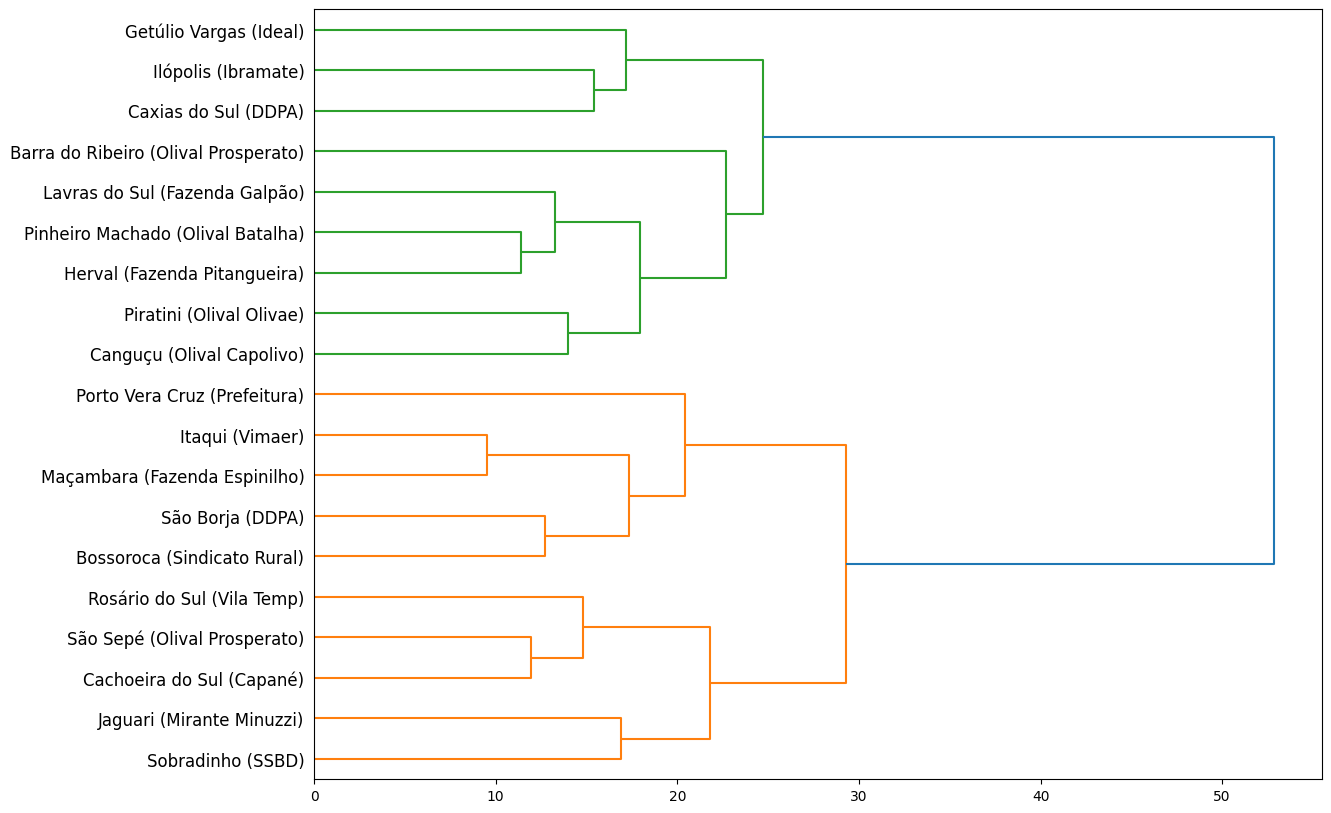

Cluster 1
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 1: 0.5271338977808092
Cluster 2
RMSE for station 0: 0.36135816270244653
RMSE for station 1: 0.4636352734203573
RMSE for station 2: 0.47114813217049967
RMSE for station 3: 0.41674417607431236
RMSE for station 4: 0.40547009094881736
RMSE for Cluster 2: 0.4236711670632866
Cluster 3
RMSE for Cluster 3: 0.0
Cluster 4
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 4: 0.4133683252424733
Cluster 5
RMSE for station 0: 0.3717772877152694
RMSE for station 1: 0.4297831025102034
RMSE for station 2: 0.3422270784634719
RMSE for station 3: 0.5914825988551344
RMSE for station 4: 0.527836661408719
RMSE for Cluster 5: 0.4526213457905596
Average Cluster RMSE: 0.3633589471754258


0.3633589471754258

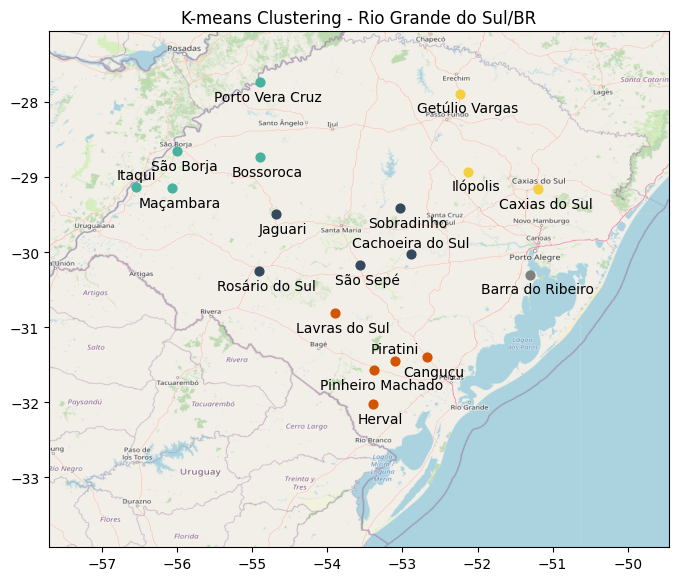

In [28]:
# K = 5
n_clusters=5
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

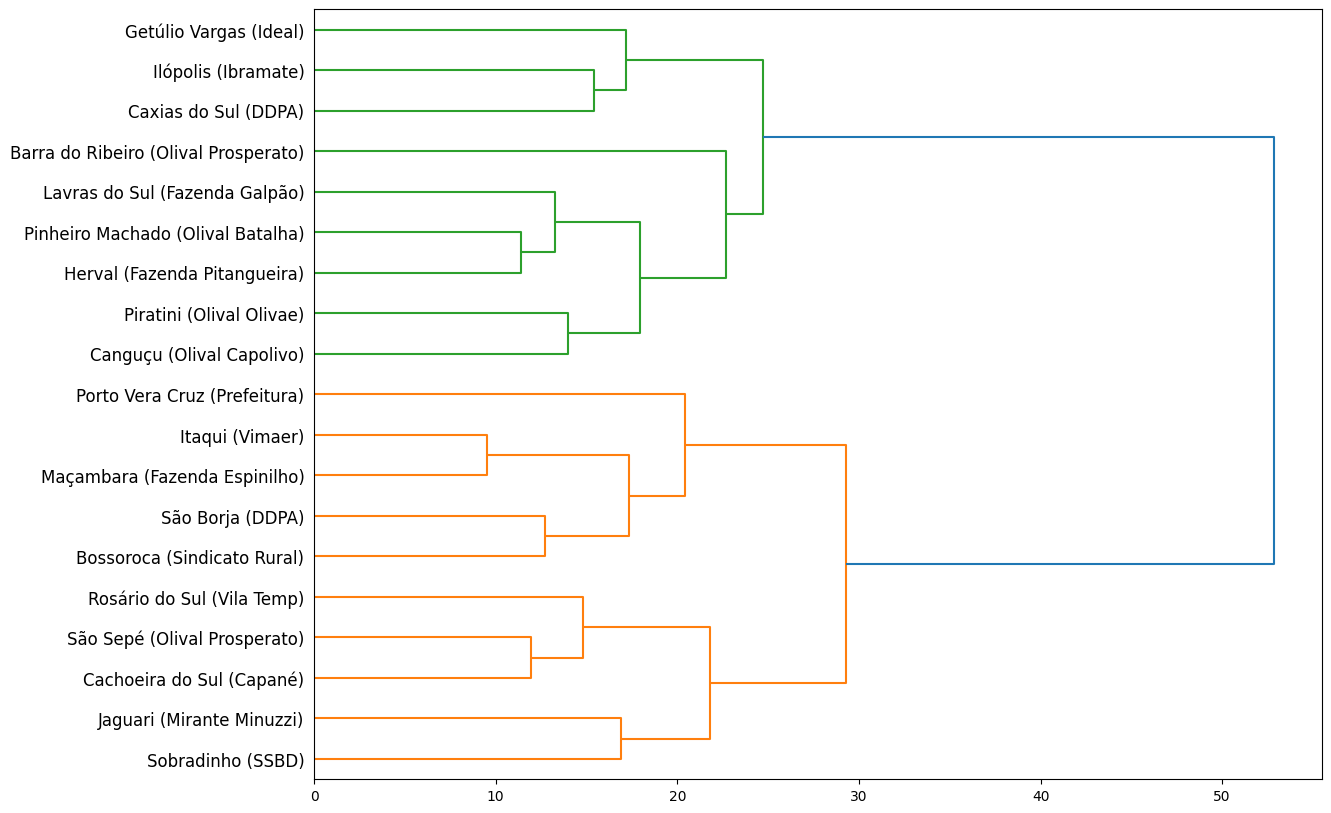

Cluster 1
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 1: 0.5271338977808092
Cluster 2
RMSE for station 0: 0.36135816270244653
RMSE for station 1: 0.4636352734203573
RMSE for station 2: 0.47114813217049967
RMSE for station 3: 0.41674417607431236
RMSE for station 4: 0.40547009094881736
RMSE for Cluster 2: 0.4236711670632866
Cluster 3
RMSE for Cluster 3: 0.0
Cluster 4
RMSE for station 0: 0.29277167296470874
RMSE for station 1: 0.31735881079079453
RMSE for station 2: 0.431139133008364
RMSE for station 3: 0.47430752987227903
RMSE for station 4: 0.5512644795762204
RMSE for Cluster 4: 0.4133683252424733
Cluster 5
RMSE for station 0: 0.36159942841974874
RMSE for station 1: 0.4532862065464944
RMSE for station 2: 0.3538554914451625
RMSE for Cluster 5: 0.38958037547046853
Cluster 6
RMSE for station 0: 0.6767029278602406
RMSE for station 1: 0.5772207261497803
RMSE for Cluster 6: 0.6269618270050104
Average Clu

0.39678593209367463

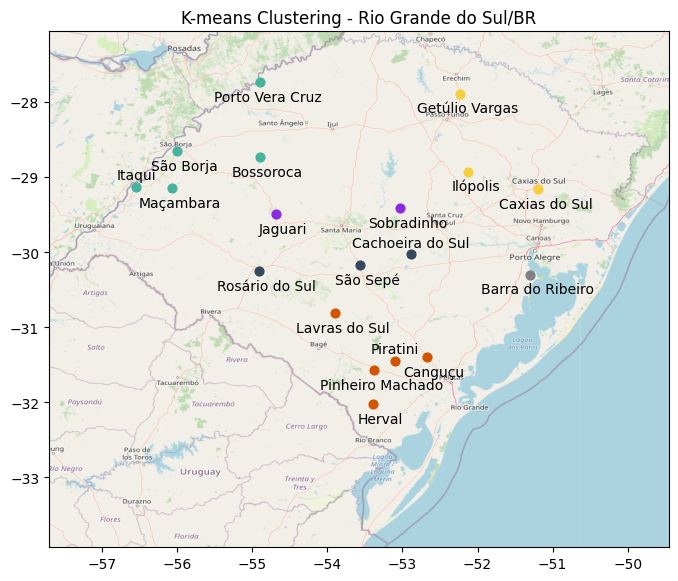

In [29]:
# K = 6
n_clusters=6
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)

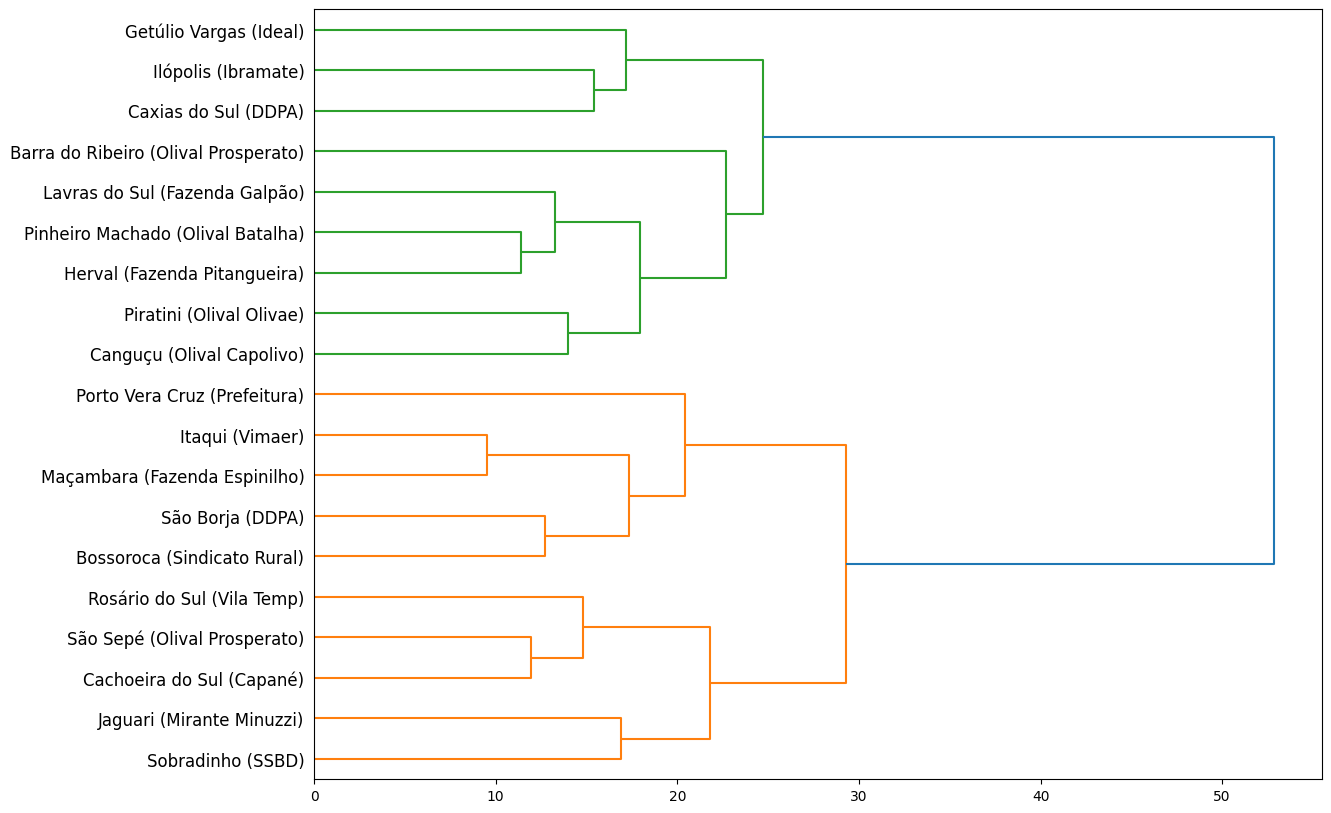

Cluster 1
RMSE for station 0: 0.4611899293702898
RMSE for station 1: 0.4686095519151184
RMSE for station 2: 0.6516022120570193
RMSE for Cluster 1: 0.5271338977808092
Cluster 2
RMSE for station 0: 0.36135816270244653
RMSE for station 1: 0.4636352734203573
RMSE for station 2: 0.47114813217049967
RMSE for station 3: 0.41674417607431236
RMSE for station 4: 0.40547009094881736
RMSE for Cluster 2: 0.4236711670632866
Cluster 3
RMSE for Cluster 3: 0.0
Cluster 4
RMSE for station 0: 0.2927741146186524
RMSE for station 1: 0.32156277592325866
RMSE for station 2: 0.44033362680328786
RMSE for station 3: 0.4786199816026702
RMSE for Cluster 4: 0.38332262473696727
Cluster 5
RMSE for Cluster 5: 0.0
Cluster 6
RMSE for station 0: 0.36159942841974874
RMSE for station 1: 0.4532862065464944
RMSE for station 2: 0.3538554914451625
RMSE for Cluster 6: 0.38958037547046853
Cluster 7
RMSE for station 0: 0.6767029278602406
RMSE for station 1: 0.5772207261497803
RMSE for Cluster 7: 0.6269618270050104
Average Cluster

0.335809984579506

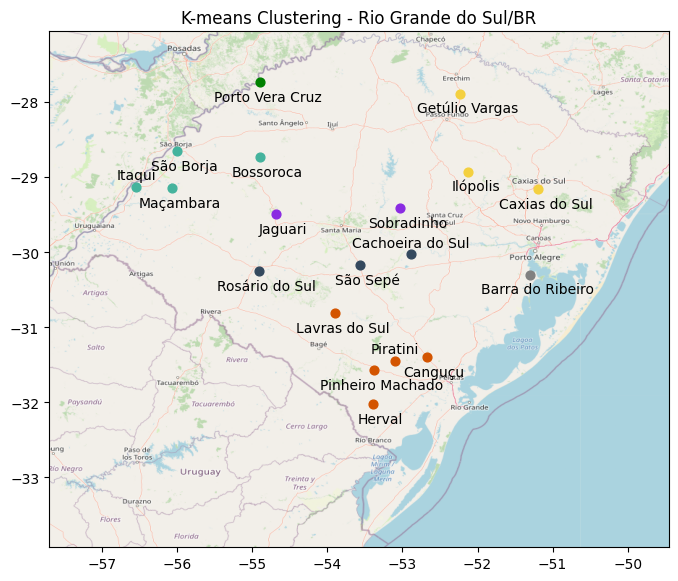

In [30]:
# K = 7
n_clusters=7
h_cluster_labels_std, h_linkage_matrix_std = dendogram_TSHierarcClustering(df_array_std, n_clusters, list_names_dendogram)
list_index_dendogram_std = leaves_list(h_linkage_matrix_std)
stations_map = stations[stations.StationID.isin(unique_station_ids) == True]
plot_map_clustering_names(stations_map,h_cluster_labels_std,"K-means Clustering - Rio Grande do Sul/BR","simagro")

# cluster evaluation
calculate_cluster_rmse(flattened_df_std, h_cluster_labels_std)